In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report, roc_curve 

import re
from functools import reduce
from collections import Counter

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

%matplotlib inline

In [67]:
encoded_data=get_n_dummies()

In [97]:
X=encoded_data.drop(['Success_rate'],axis=1)
Y=round(encoded_data['Success_rate'],4)

#train, valid & test test split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape,X_valid.shape

((4438, 74), (1902, 74))

In [98]:
cols=X_train.columns
scaler=preprocessing.MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_train=pd.DataFrame(X_train,columns=cols)
X_valid=pd.DataFrame(X_valid,columns=cols)

In [126]:
#X_train.describe()

# DNN REGRESSION MODEL

In [148]:
#sequential
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(16,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(Dense(1,activation='sigmoid'))
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='mae',optimizer=opt,metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 16)                1200      
                                                                 
 dense_56 (Dense)            (None, 8)                 136       
                                                                 
 dense_57 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [149]:
model_history=model.fit(X_train,Y_train,epochs=120,batch_size=32,validation_data=(X_valid, Y_valid),verbose=2)
model_history

Epoch 1/120
139/139 - 5s - loss: 0.5656 - root_mean_squared_error: 0.3590 - val_loss: 0.4941 - val_root_mean_squared_error: 0.3502 - 5s/epoch - 38ms/step
Epoch 2/120
139/139 - 0s - loss: 0.4281 - root_mean_squared_error: 0.3406 - val_loss: 0.3890 - val_root_mean_squared_error: 0.3467 - 432ms/epoch - 3ms/step
Epoch 3/120
139/139 - 0s - loss: 0.3468 - root_mean_squared_error: 0.3399 - val_loss: 0.3311 - val_root_mean_squared_error: 0.3483 - 370ms/epoch - 3ms/step
Epoch 4/120
139/139 - 0s - loss: 0.3115 - root_mean_squared_error: 0.3406 - val_loss: 0.3157 - val_root_mean_squared_error: 0.3495 - 401ms/epoch - 3ms/step
Epoch 5/120
139/139 - 0s - loss: 0.3046 - root_mean_squared_error: 0.3409 - val_loss: 0.3114 - val_root_mean_squared_error: 0.3479 - 316ms/epoch - 2ms/step
Epoch 6/120
139/139 - 0s - loss: 0.3024 - root_mean_squared_error: 0.3407 - val_loss: 0.3079 - val_root_mean_squared_error: 0.3443 - 363ms/epoch - 3ms/step
Epoch 7/120
139/139 - 0s - loss: 0.3005 - root_mean_squared_error:

Epoch 54/120
139/139 - 0s - loss: 0.2705 - root_mean_squared_error: 0.3191 - val_loss: 0.2777 - val_root_mean_squared_error: 0.3280 - 424ms/epoch - 3ms/step
Epoch 55/120
139/139 - 0s - loss: 0.2703 - root_mean_squared_error: 0.3198 - val_loss: 0.2736 - val_root_mean_squared_error: 0.3232 - 401ms/epoch - 3ms/step
Epoch 56/120
139/139 - 0s - loss: 0.2694 - root_mean_squared_error: 0.3199 - val_loss: 0.2768 - val_root_mean_squared_error: 0.3257 - 386ms/epoch - 3ms/step
Epoch 57/120
139/139 - 0s - loss: 0.2693 - root_mean_squared_error: 0.3188 - val_loss: 0.2730 - val_root_mean_squared_error: 0.3210 - 354ms/epoch - 3ms/step
Epoch 58/120
139/139 - 0s - loss: 0.2688 - root_mean_squared_error: 0.3195 - val_loss: 0.2735 - val_root_mean_squared_error: 0.3203 - 348ms/epoch - 3ms/step
Epoch 59/120
139/139 - 0s - loss: 0.2688 - root_mean_squared_error: 0.3186 - val_loss: 0.2725 - val_root_mean_squared_error: 0.3223 - 317ms/epoch - 2ms/step
Epoch 60/120
139/139 - 0s - loss: 0.2687 - root_mean_squar

Epoch 107/120
139/139 - 0s - loss: 0.2551 - root_mean_squared_error: 0.3075 - val_loss: 0.2678 - val_root_mean_squared_error: 0.3181 - 417ms/epoch - 3ms/step
Epoch 108/120
139/139 - 0s - loss: 0.2553 - root_mean_squared_error: 0.3068 - val_loss: 0.2671 - val_root_mean_squared_error: 0.3181 - 432ms/epoch - 3ms/step
Epoch 109/120
139/139 - 0s - loss: 0.2554 - root_mean_squared_error: 0.3079 - val_loss: 0.2665 - val_root_mean_squared_error: 0.3159 - 439ms/epoch - 3ms/step
Epoch 110/120
139/139 - 0s - loss: 0.2552 - root_mean_squared_error: 0.3066 - val_loss: 0.2666 - val_root_mean_squared_error: 0.3174 - 332ms/epoch - 2ms/step
Epoch 111/120
139/139 - 0s - loss: 0.2544 - root_mean_squared_error: 0.3064 - val_loss: 0.2656 - val_root_mean_squared_error: 0.3168 - 370ms/epoch - 3ms/step
Epoch 112/120
139/139 - 0s - loss: 0.2548 - root_mean_squared_error: 0.3075 - val_loss: 0.2669 - val_root_mean_squared_error: 0.3181 - 386ms/epoch - 3ms/step
Epoch 113/120
139/139 - 0s - loss: 0.2541 - root_mea

In [120]:
#model_history.history['val_root_mean_squared_error']

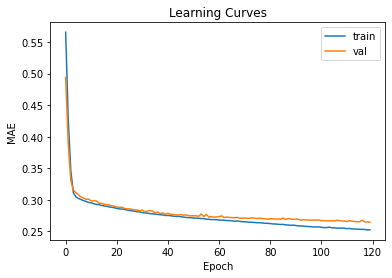

In [150]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MAE')
pyplot.plot(model_history.history['loss'], label='train')
pyplot.plot(model_history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [151]:
eval1=model.evaluate(X_valid, Y_valid,verbose=2)

60/60 - 0s - loss: 0.2645 - root_mean_squared_error: 0.3161 - 87ms/epoch - 1ms/step


In [152]:
eval1

[0.26447004079818726, 0.31613174080848694]

# SAVE & LOAD MODEL

In [153]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [154]:
# load json and create model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [155]:
# evaluate loaded model on test data
loaded_model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
score = loaded_model.evaluate(X_valid, Y_valid, verbose=0)
print("%s: %.2f " % (loaded_model.metrics_names[1], score[1]))

root_mean_squared_error: 0.32 


In [156]:
# evaluate loaded model on test data
loaded_model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
score = loaded_model.evaluate(X_valid, Y_valid, verbose=0)
print("%s: %.2f " % (loaded_model.metrics_names[1], score[1]))

mean_absolute_error: 0.25 
